In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
#Importing the data
complete_data = pd.read_csv('../bezant-assignment/bezant-assignement-data/assignment_labels_ohlcv.csv')
complete_data['timestamp'] = pd.to_datetime(complete_data['timestamp'])
features_set = pd.read_csv('../bezant-assignment/bezant-assignement-data/assignment_features.csv')
features_set['timestamp'] = pd.to_datetime(features_set['timestamp'])


df = pd.merge_asof(features_set, complete_data, on ="timestamp")
#Displaying the first 10 rows
complete_data.head(10)

df.head(10)

,timestamp,feature_001,feature_002,feature_003,feature_004,feature_005,feature_006,feature_007,feature_008,feature_009,...,feature_102,feature_103,feature_104,low,high,open,close,volume,threshold,label
0,2021-02-02 06:00:00+00:00,-2.5,-1.764968,0.514661,-9.0,0.059696,0.514661,1.0,0.028799,-0.451389,...,-1.475383,-1.460655,-1.473915,33961.99,34350.00,34026.99,34306.72,774.068600,0.008630,1.0
1,2021-02-02 07:00:00+00:00,-2.0,-1.844100,0.608483,-9.0,-0.008731,0.608483,1.0,-0.235918,0.160703,...,-1.129426,-1.443462,-1.464099,34161.18,34404.86,34318.27,34260.00,587.215907,0.008559,1.0
2,2021-02-02 08:00:00+00:00,-2.5,-0.509060,0.712918,-8.0,0.195984,0.712918,1.0,-0.835152,-0.707301,...,-1.451156,-1.420594,-1.119294,34122.38,34691.25,34254.53,34687.91,623.271300,0.008595,1.0
3,2021-02-02 09:00:00+00:00,-2.5,-1.649360,-1.497412,-9.0,0.383517,-1.497412,-60.0,-0.874020,-1.103401,...,-1.418840,-1.393948,-1.440192,34689.63,35649.22,34689.63,35338.33,1670.998639,0.008692,0.0
4,2021-02-02 10:00:00+00:00,-2.0,-1.375355,-1.527329,-9.0,0.099605,-1.527329,-59.0,-0.630105,0.446164,...,-1.057829,-1.046641,-1.408281,34881.62,35432.33,35346.09,35157.55,836.005195,0.008662,0.0
5,2021-02-02 11:00:00+00:00,-1.5,-1.950518,-1.176911,-7.0,0.507392,-1.176911,1.0,-0.237370,0.947398,...,-0.704883,-0.707473,-1.048480,34674.39,35279.85,35160.97,34710.00,681.620162,0.008708,1.0
6,2021-02-02 12:00:00+00:00,-1.0,-1.870600,-1.110603,-6.0,-0.034207,-1.110603,1.0,-0.263356,-0.078288,...,-0.689106,-0.371509,-0.696526,34572.63,35031.56,34710.00,34810.59,712.759111,0.008644,1.0
7,2021-02-02 13:00:00+00:00,-0.5,-1.897030,-0.756858,-8.0,-0.114055,-0.756858,1.0,-0.067708,-0.098804,...,-0.700627,-0.384293,-0.680817,34778.85,35237.51,34810.59,34865.93,664.623225,0.008566,1.0
8,2021-02-02 14:00:00+00:00,-2.0,-2.149492,-0.726684,-4.0,-0.090761,-0.726684,-31.0,0.473919,0.170346,...,-0.373149,0.254049,-0.692211,34403.73,34948.17,34871.22,34817.00,992.420135,0.008497,1.0
9,2021-02-02 15:00:00+00:00,-1.5,-1.501017,-0.480953,-5.0,-0.103312,-0.480953,-4.0,0.333843,0.227207,...,0.299980,-0.085132,-0.365449,34600.00,35200.00,34818.65,34750.02,1249.738307,0.008435,1.0


In [3]:
df_filter = df.isin([np.nan, np.inf, -np.inf])
# Mask df with the filter
df = df[~df_filter]
df.dropna(inplace=True)
print(df)

                      timestamp  feature_001  feature_002  feature_003  \
0     2021-02-02 06:00:00+00:00         -2.5    -1.764968     0.514661   
1     2021-02-02 07:00:00+00:00         -2.0    -1.844100     0.608483   
2     2021-02-02 08:00:00+00:00         -2.5    -0.509060     0.712918   
3     2021-02-02 09:00:00+00:00         -2.5    -1.649360    -1.497412   
4     2021-02-02 10:00:00+00:00         -2.0    -1.375355    -1.527329   
...                         ...          ...          ...          ...   
12120 2022-06-22 06:00:00+00:00         -0.5     1.284953    -0.194020   
12121 2022-06-22 07:00:00+00:00         -1.0     1.265739    -0.441905   
12122 2022-06-22 08:00:00+00:00         -0.5     1.323089    -1.052231   
12123 2022-06-22 09:00:00+00:00         -2.5     1.168901    -1.342207   
12124 2022-06-22 10:00:00+00:00         -2.0     1.121340    -0.568351   

       feature_004  feature_005  feature_006  feature_007  feature_008  \
0             -9.0     0.059696     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11443 entries, 0 to 12124
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   timestamp    11443 non-null  datetime64[ns, UTC]
 1   feature_001  11443 non-null  float64            
 2   feature_002  11443 non-null  float64            
 3   feature_003  11443 non-null  float64            
 4   feature_004  11443 non-null  float64            
 5   feature_005  11443 non-null  float64            
 6   feature_006  11443 non-null  float64            
 7   feature_007  11443 non-null  float64            
 8   feature_008  11443 non-null  float64            
 9   feature_009  11443 non-null  float64            
 10  feature_011  11443 non-null  float64            
 11  feature_012  11443 non-null  float64            
 12  feature_013  11443 non-null  float64            
 13  feature_014  11443 non-null  float64            
 14  feature_015  11443 non

In [5]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter

list_features = list(df.loc[:, 'feature_001':'threshold'].columns)
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'feature_001':'threshold'].values, df['label'].values, train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=df['label'].values)

# smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
# x_train, y_train = smote.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_train))

if 0.7*x_train.shape[0] < 2500:
    train_split = 0.8
else:
    train_split = 0.7
# train_split = 0.7
print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split, test_size=1-train_split, 
                                                random_state=2, shuffle=True, stratify=y_train)
mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

x_main = x_train.copy()
print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Total number of features 78
train_split = 0.7
Shape of x, y train/cv/test (6407, 78) (6407,) (2747, 78) (2747,) (2289, 78) (2289,)


In [6]:
num_features = 64  # should be a perfect square
selection_method = 'all'
topk = 78 if selection_method == 'all' else num_features
# if train_split >= 0.8:
#     topk = 400
# else:
#     topk = 300

In [7]:
%%time
from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

if selection_method == 'anova' or selection_method == 'all':
    select_k_best = SelectKBest(f_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)
    
    selected_features_anova = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(selected_features_anova)
    print(select_k_best.get_support(indices=True))
    print("****************************************")
    
if selection_method == 'mutual_info' or selection_method == 'all':
    select_k_best = SelectKBest(mutual_info_classif, k=topk)
    if selection_method != 'all':
        x_train = select_k_best.fit_transform(x_main, y_train)
        x_cv = select_k_best.transform(x_cv)
        x_test = select_k_best.transform(x_test)
    else:
        select_k_best.fit(x_main, y_train)

    selected_features_mic = itemgetter(*select_k_best.get_support(indices=True))(list_features)
    print(len(selected_features_mic), selected_features_mic)
    print(select_k_best.get_support(indices=True))

('feature_001', 'feature_002', 'feature_003', 'feature_004', 'feature_005', 'feature_006', 'feature_007', 'feature_008', 'feature_009', 'feature_011', 'feature_012', 'feature_013', 'feature_014', 'feature_015', 'feature_016', 'feature_017', 'feature_018', 'feature_019', 'feature_021', 'feature_022', 'feature_023', 'feature_024', 'feature_026', 'feature_027', 'feature_028', 'feature_030', 'feature_032', 'feature_033', 'feature_034', 'feature_035', 'feature_036', 'feature_037', 'feature_038', 'feature_039', 'feature_040', 'feature_041', 'feature_042', 'feature_043', 'feature_044', 'feature_045', 'feature_046', 'feature_047', 'feature_049', 'feature_050', 'feature_051', 'feature_052', 'feature_053', 'feature_055', 'feature_057', 'feature_060', 'feature_061', 'feature_062', 'feature_064', 'feature_065', 'feature_066', 'feature_068', 'feature_071', 'feature_073', 'feature_074', 'feature_075', 'feature_077', 'feature_081', 'feature_086', 'feature_092', 'feature_094', 'feature_095', 'feature_

In [8]:
if selection_method == 'all':
    common = list(set(selected_features_anova).intersection(selected_features_mic))
    print("common selected featues", len(common), common)
    if len(common) < num_features:
        raise Exception('number of common features found {} < {} required features. Increase "topk variable"'.format(len(common), num_features))
    feat_idx = []
    for c in common:
        feat_idx.append(list_features.index(c))
    feat_idx = sorted(feat_idx[0:64])
    print(feat_idx)

common selected featues 78 ['feature_018', 'feature_092', 'feature_050', 'feature_060', 'feature_099', 'feature_039', 'feature_064', 'feature_022', 'feature_057', 'feature_102', 'feature_027', 'feature_053', 'feature_103', 'feature_043', 'feature_026', 'feature_035', 'volume', 'feature_042', 'feature_094', 'feature_047', 'feature_062', 'feature_055', 'feature_038', 'feature_003', 'feature_004', 'feature_021', 'feature_075', 'close', 'feature_008', 'feature_005', 'feature_104', 'feature_095', 'feature_017', 'feature_001', 'open', 'feature_071', 'feature_049', 'feature_019', 'feature_006', 'feature_066', 'feature_061', 'feature_011', 'feature_077', 'feature_045', 'feature_101', 'feature_037', 'feature_023', 'feature_040', 'feature_041', 'feature_007', 'feature_033', 'feature_009', 'feature_030', 'feature_014', 'feature_065', 'feature_044', 'feature_012', 'feature_024', 'feature_013', 'threshold', 'feature_032', 'feature_081', 'feature_096', 'feature_046', 'feature_073', 'feature_068', 'f

In [9]:
if selection_method == 'all':
    x_train = x_train[:, feat_idx]
    x_cv = x_cv[:, feat_idx]
    x_test = x_test[:, feat_idx]

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, 
                                                             y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Shape of x, y train/cv/test (6407, 64) (6407,) (2747, 64) (2747,) (2289, 64) (2289,)


In [10]:
_labels, _counts = np.unique(y_train, return_counts=True)
print("percentage of class 0 = {}, class 1 = {}".format(_counts[0]/len(y_train) * 100, _counts[1]/len(y_train) * 100))

percentage of class 0 = 49.19619166536601, class 1 = 50.80380833463399


In [11]:
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

def get_sample_weights(y):
    """
    calculate the sample weights based on class weights. Used for models with
    imbalanced data and one hot encoding prediction.

    params:
        y: class labels as integers
    """

    y = y.astype(int)  # compute_class_weight needs int labels
    class_weights = compute_class_weight(class_weight ='balanced', classes = np.unique(y), y = y)
    
    print("real class weights are {}".format(class_weights), np.unique(y))
    print("value_counts", np.unique(y, return_counts=True))
    sample_weights = y.copy().astype(float)
    for i in np.unique(y):
        sample_weights[sample_weights == i] = class_weights[i]  # if i == 2 else 0.8 * class_weights[i]
        # sample_weights = np.where(sample_weights == i, class_weights[int(i)], y_)

    return sample_weights

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

def f1_weighted(y_true, y_pred):
    y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)  # can use conf_mat[0, :], tf.slice()
    # precision = TP/TP+FP, recall = TP/TP+FN
    rows, cols = conf_mat.get_shape()
    size = y_true_class.get_shape()[0]
    precision = tf.constant([0, 0, 0])  # change this to use rows/cols as size
    recall = tf.constant([0, 0, 0])
    class_counts = tf.constant([0, 0, 0])

    def get_precision(i, conf_mat):
        print("prec check", conf_mat, conf_mat[i, i], tf.reduce_sum(conf_mat[:, i]))
        precision[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[:, i]))
        recall[i].assign(conf_mat[i, i] / tf.reduce_sum(conf_mat[i, :]))
        tf.add(i, 1)
        return i, conf_mat, precision, recall

    def tf_count(i):
        elements_equal_to_value = tf.equal(y_true_class, i)
        as_ints = tf.cast(elements_equal_to_value, tf.int32)
        count = tf.reduce_sum(as_ints)
        class_counts[i].assign(count)
        tf.add(i, 1)
        return count

    def condition(i, conf_mat):
        return tf.less(i, 3)

    i = tf.constant(3)
    i, conf_mat = tf.while_loop(condition, get_precision, [i, conf_mat])

    i = tf.constant(3)
    c = lambda i: tf.less(i, 3)
    b = tf_count(i)
    tf.while_loop(c, b, [i])

    weights = tf.math.divide(class_counts, size)
    numerators = tf.math.multiply(tf.math.multiply(precision, recall), tf.constant(2))
    denominators = tf.math.add(precision, recall)
    f1s = tf.math.divide(numerators, denominators)
    weighted_f1 = tf.reduce_sum(f.math.multiply(f1s, weights))
    return weighted_f1

def f1_metric(y_true, y_pred):
    """
    this calculates precision & recall 
    """

    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))  # mistake: y_pred of 0.3 is also considered 1
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    # y_true_class = tf.math.argmax(y_true, axis=1, output_type=tf.dtypes.int32)
    # y_pred_class = tf.math.argmax(y_pred, axis=1, output_type=tf.dtypes.int32)
    # conf_mat = tf.math.confusion_matrix(y_true_class, y_pred_class)
    # tf.Print(conf_mat, [conf_mat], "confusion_matrix")

    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

get_custom_objects().update({"f1_metric": f1_metric, "f1_weighted": f1_weighted})

In [12]:
sample_weights = get_sample_weights(y_train)
print("Test sample_weights")
rand_idx = np.random.randint(0, 1000, 30)
print(y_train[rand_idx])
print(sample_weights[rand_idx])

real class weights are [1.01633883 0.98417819] [0 1]
value_counts (array([0, 1]), array([3152, 3255]))
Test sample_weights
[1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 0. 0. 1.]
[0.98417819 1.01633883 1.01633883 1.01633883 1.01633883 0.98417819
 0.98417819 0.98417819 0.98417819 1.01633883 0.98417819 1.01633883
 1.01633883 1.01633883 0.98417819 1.01633883 0.98417819 1.01633883
 0.98417819 1.01633883 0.98417819 1.01633883 0.98417819 1.01633883
 1.01633883 0.98417819 0.98417819 1.01633883 1.01633883 0.98417819]


In [13]:
one_hot_enc = OneHotEncoder(sparse=False, categories='auto')  # , categories='auto'
y_train = one_hot_enc.fit_transform(y_train.reshape(-1, 1))
print("y_train",y_train.shape)
y_cv = one_hot_enc.transform(y_cv.reshape(-1, 1))
y_test = one_hot_enc.transform(y_test.reshape(-1, 1))

y_train (6407, 2)


In [14]:
dim = int(np.sqrt(num_features))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)
print("final shape of x, y train/test {} {} {} {}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

final shape of x, y train/test (6407, 8, 8, 3) (6407, 2) (2289, 8, 8, 3) (2289, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


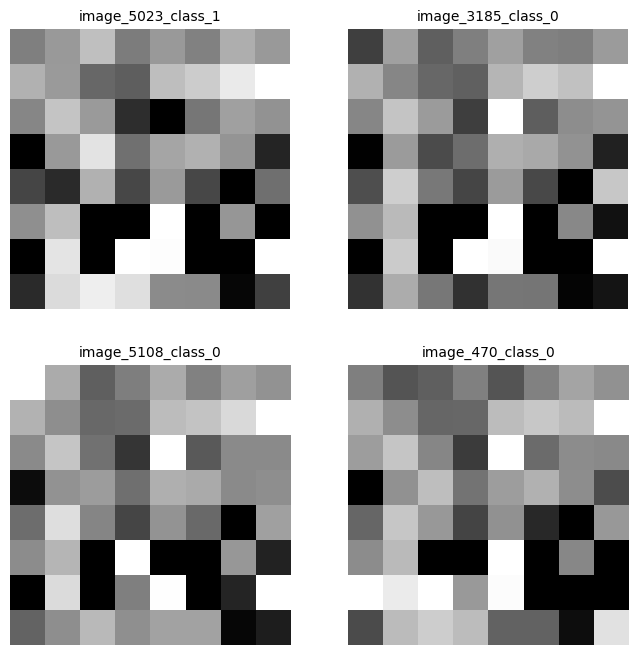

In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
columns = rows = 2
for i in range(1, columns*rows +1):
    index = np.random.randint(len(x_train))
    img = x_train[index]
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title('image_'+str(index)+'_class_'+str(np.argmax(y_train[index])), fontsize=10)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.imshow(img)
plt.show()

In [16]:
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.initializers import RandomUniform, RandomNormal
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers

params = {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.22, 'conv2d_filters_1': 20, 'conv2d_kernel_size_1': 2, 'conv2d_mp_1': 2, 
                                              'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.05, 
                                              'conv2d_filters_2': 40, 'conv2d_kernel_size_2': 2, 'conv2d_mp_2': 2, 'conv2d_strides_2': 2, 
                                              'kernel_regularizer_2': 0.0, 'layers': 'two'}, 
          'dense_layers': {'dense_do_1': 0.22, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
          'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}

# Original paper CNN params: input layer (15x15), two convolutional layers (15x15x32, 15x15x64),
# a max pooling (7x7x64), two dropout (0.25, 0.50), fully connected layers (128), and an out-
# put layer (3). stride?
# params = {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.25, 'conv2d_filters_1': 32, 'conv2d_kernel_size_1': 3, 'conv2d_mp_1': 0, 
#                                                'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.5, 
#                                                'conv2d_filters_2': 64, 'conv2d_kernel_size_2': 3, 'conv2d_mp_2': 7, 'conv2d_strides_2': 1, 
#                                                'kernel_regularizer_2': 0.0, 'layers': 'two'}, 
#            'dense_layers': {'dense_do_1': 0.0, 'dense_nodes_1': 128, 'kernel_regularizer_1': 0.0, 'layers': 'one'},
#            'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}

In [17]:
from functools import *
from sklearn.metrics import f1_score
from tensorflow.keras.metrics import AUC

def f1_custom(y_true, y_pred):
    y_t = np.argmax(y_true, axis=1)
    y_p = np.argmax(y_pred, axis=1)
    f1_score(y_t, y_p, labels=None, average='weighted', sample_weight=None, zero_division='warn')

def create_model_cnn(params):
    model = Sequential()

    print("Training with params {}".format(params))
    # (batch_size, timesteps, data_dim)
    # x_train, y_train = get_data_cnn(df, df.head(1).iloc[0]["timestamp"])[0:2]
    conv2d_layer1 = Conv2D(params["conv2d_layers"]["conv2d_filters_1"],
                           params["conv2d_layers"]["conv2d_kernel_size_1"],
                           strides=params["conv2d_layers"]["conv2d_strides_1"],
                           kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_1"]), 
                           padding='valid',activation="relu", use_bias=True,
                           kernel_initializer='glorot_uniform',
                           input_shape=(x_train[0].shape[0],
                                        x_train[0].shape[1], x_train[0].shape[2]))
    model.add(conv2d_layer1)
    if params["conv2d_layers"]['conv2d_mp_1'] == 1:
        model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(params['conv2d_layers']['conv2d_do_1']))
    if params["conv2d_layers"]['layers'] == 'two':
        conv2d_layer2 = Conv2D(params["conv2d_layers"]["conv2d_filters_2"],
                               params["conv2d_layers"]["conv2d_kernel_size_2"],
                               strides=params["conv2d_layers"]["conv2d_strides_2"],
                               kernel_regularizer=regularizers.l2(params["conv2d_layers"]["kernel_regularizer_2"]),
                               padding='valid',activation="relu", use_bias=True,
                               kernel_initializer='glorot_uniform')
        model.add(conv2d_layer2)
        if params["conv2d_layers"]['conv2d_mp_2'] == 1:
            model.add(MaxPool2D(pool_size=2))
        model.add(Dropout(params['conv2d_layers']['conv2d_do_2']))

    model.add(Flatten())

    model.add(Dense(params['dense_layers']["dense_nodes_1"], activation='relu'))
    model.add(Dropout(params['dense_layers']['dense_do_1']))

    if params['dense_layers']["layers"] == 'two':
        model.add(Dense(params['dense_layers']["dense_nodes_2"], activation='relu', 
                        kernel_regularizer=params['dense_layers']["kernel_regularizer_1"]))
        model.add(Dropout(params['dense_layers']['dense_do_2']))

    model.add(Dense(2, activation='softmax'))
#     model.add(GlobalAveragePooling2D())
    if params["optimizer"] == 'rmsprop':
        optimizer = optimizers.RMSprop(lr=params["lr"])
    elif params["optimizer"] == 'sgd':
        optimizer = optimizers.SGD(lr=params["lr"], decay=1e-6, momentum=0.9, nesterov=True)
    elif params["optimizer"] == 'adam':
        optimizer = optimizers.Adam(learning_rate=params["lr"], beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy', f1_metric])
    # from keras.utils.vis_utils import plot_model use this too for diagram with plot
    # model.summary(print_fn=lambda x: print(x + '\n'))
    return model

def check_baseline(pred, y_test):
    print("size of test set", len(y_test))
    e = np.equal(pred, y_test)
    print("TP class counts", np.unique(y_test[e], return_counts=True))
    print("True class counts", np.unique(y_test, return_counts=True))
    print("Pred class counts", np.unique(pred, return_counts=True))
    holds = np.unique(y_test, return_counts=True)[0][1]  # number 'hold' predictions
    print("baseline acc:", (holds/len(y_test)*100))

In [18]:
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot, plot_model

model = create_model_cnn(params)
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

# SVG(model_to_dot(model).create(prog='dot', format='svg'))

Training with params {'batch_size': 80, 'conv2d_layers': {'conv2d_do_1': 0.22, 'conv2d_filters_1': 20, 'conv2d_kernel_size_1': 2, 'conv2d_mp_1': 2, 'conv2d_strides_1': 1, 'kernel_regularizer_1': 0.0, 'conv2d_do_2': 0.05, 'conv2d_filters_2': 40, 'conv2d_kernel_size_2': 2, 'conv2d_mp_2': 2, 'conv2d_strides_2': 2, 'kernel_regularizer_2': 0.0, 'layers': 'two'}, 'dense_layers': {'dense_do_1': 0.22, 'dense_nodes_1': 100, 'kernel_regularizer_1': 0.0, 'layers': 'one'}, 'epochs': 3000, 'lr': 0.001, 'optimizer': 'adam'}
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [19]:
import os

best_model_path = os.path.join('.', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=100, min_delta=0.0001)
# csv_logger = CSVLogger(os.path.join(OUTPUT_PATH, 'log_training_batch.log'), append=True)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.02, patience=20, verbose=1, mode='min',
                        min_delta=0.001, cooldown=1, min_lr=0.0001)
mcp = ModelCheckpoint(best_model_path, monitor='val_f1_metric', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='max', save_freq=1)  # val_f1_metric

In [20]:
 x_train[0].shape[0],x_train[0].shape[1], x_train[0].shape[2]

(8, 8, 3)

In [21]:
%%time
history = model.fit(x_train, y_train, epochs=params['epochs'], verbose=1,
                            batch_size=64, shuffle=True,
                            # validation_split=0.3,
                            validation_data=(x_cv, y_cv),
                            callbacks=[mcp, rlp, es]
                            , sample_weight=sample_weights)

Epoch 1/3000
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
 75/101 [=====================>........] - ETA: 0s - loss: 0.6942 - accuracy: 0.5002 - f1_metric: 0.5002WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 2s 7ms/step - loss: 0.6941 - accuracy: 0.5010 - f1_metric: 0.5029 - val_loss: 0.6921 - val_accuracy: 0.5147 - val_f1_metric: 0.5147 - lr: 0.0010
Epoch 2/3000
 59/101 [================>.............] - ETA: 0s - loss: 0.6936 - accuracy: 0.4974 - f1_metric: 0.4974WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6927 - accuracy: 0.5138 - f1_metric: 0.5131 - val_loss: 0.6923 - val_accuracy: 0.5169 - val_f1_metric: 0.5170 - lr: 0.0010
Epoch 3/3000
 44/101 [============>.................] - ETA: 0s - loss: 0.6918 - accuracy: 0.5273 - f1_metric: 0.5273WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6913 - accuracy: 0.5285 - f1_metric: 0.5289 - val_loss: 0.6929 - val_accuracy: 0.5173 - val_f1_metric: 0.5174 - lr: 0.0010
Epoch 4/3000
 30/101 [=======>......................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5198 - f1_metric: 0.5198WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5205 - f1_metric: 0.5185 - val_loss: 0.6913 - val_accuracy: 0.5220 - val_f1_metric: 0.5220 - lr: 0.0010
Epoch 5/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6906 - accuracy: 0.5312 - f1_metric: 0.5312WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5275 - f1_metric: 0.5267 - val_loss: 0.6909 - val_accuracy: 0.5235 - val_f1_metric: 0.5235 - lr: 0.0010
Epoch 6/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6900 - accuracy: 0.5469 - f1_metric: 0.5469WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5380 - f1_metric: 0.5370 - val_loss: 0.6918 - val_accuracy: 0.5115 - val_f1_metric: 0.5115 - lr: 0.0010
Epoch 7/3000


 89/101 [=========================>....] - ETA: 0s - loss: 0.6884 - accuracy: 0.5427 - f1_metric: 0.5427WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5394 - f1_metric: 0.5410 - val_loss: 0.6918 - val_accuracy: 0.5140 - val_f1_metric: 0.5140 - lr: 0.0010
Epoch 8/3000
 74/101 [====================>.........] - ETA: 0s - loss: 0.6882 - accuracy: 0.5370 - f1_metric: 0.5370WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6891 - accuracy: 0.5318 - f1_metric: 0.5296 - val_loss: 0.6913 - val_accuracy: 0.5224 - val_f1_metric: 0.5224 - lr: 0.0010
Epoch 9/3000
 59/101 [================>.............] - ETA: 0s - loss: 0.6880 - accuracy: 0.5450 - f1_metric: 0.5450WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6877 - accuracy: 0.5482 - f1_metric: 0.5484 - val_loss: 0.6912 - val_accuracy: 0.5220 - val_f1_metric: 0.5221 - lr: 0.0010
Epoch 10/3000
 46/101 [============>.................] - ETA: 0s - loss: 0.6899 - accuracy: 0.5421 - f1_metric: 0.5421WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5418 - f1_metric: 0.5420 - val_loss: 0.6926 - val_accuracy: 0.5202 - val_f1_metric: 0.5202 - lr: 0.0010
Epoch 11/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6889 - accuracy: 0.5388 - f1_metric: 0.5388WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6891 - accuracy: 0.5361 - f1_metric: 0.5352 - val_loss: 0.6915 - val_accuracy: 0.5231 - val_f1_metric: 0.5232 - lr: 0.0010
Epoch 12/3000
 11/101 [==>...........................] - ETA: 0s - loss: 0.6866 - accuracy: 0.5582 - f1_metric: 0.5582WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6876 - accuracy: 0.5496 - f1_metric: 0.5535 - val_loss: 0.6913 - val_accuracy: 0.5268 - val_f1_metric: 0.5268 - lr: 0.0010
Epoch 13/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6871 - accuracy: 0.5312 - f1_metric: 0.5312WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 83/101 [=======================>......] - ETA: 0s - loss: 0.6849 - accuracy: 0.5548 - f1_metric: 0.5548WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5510 - f1_metric: 0.5511 - val_loss: 0.6912 - val_accuracy: 0.5260 - val_f1_metric: 0.5262 - lr: 0.0010
Epoch 14/3000
 74/101 [====================>.........] - ETA: 0s - loss: 0.6872 - accuracy: 0.5460 - f1_metric: 0.5460WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6875 - accuracy: 0.5410 - f1_metric: 0.5387 - val_loss: 0.6911 - val_accuracy: 0.5289 - val_f1_metric: 0.5291 - lr: 0.0010
Epoch 15/3000
 60/101 [================>.............] - ETA: 0s - loss: 0.6861 - accuracy: 0.5456 - f1_metric: 0.5456WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6862 - accuracy: 0.5441 - f1_metric: 0.5431 - val_loss: 0.6908 - val_accuracy: 0.5246 - val_f1_metric: 0.5247 - lr: 0.0010
Epoch 16/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6879 - accuracy: 0.5472 - f1_metric: 0.5472WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6860 - accuracy: 0.5466 - f1_metric: 0.5443 - val_loss: 0.6917 - val_accuracy: 0.5144 - val_f1_metric: 0.5143 - lr: 0.0010
Epoch 17/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6872 - accuracy: 0.5458 - f1_metric: 0.5458WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5469 - f1_metric: 0.5471 - val_loss: 0.6912 - val_accuracy: 0.5235 - val_f1_metric: 0.5234 - lr: 0.0010
Epoch 18/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6838 - accuracy: 0.5604 - f1_metric: 0.5604WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6843 - accuracy: 0.5581 - f1_metric: 0.5570 - val_loss: 0.6904 - val_accuracy: 0.5359 - val_f1_metric: 0.5359 - lr: 0.0010
Epoch 19/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6771 - accuracy: 0.5469 - f1_metric: 0.5469WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 85/101 [========================>.....] - ETA: 0s - loss: 0.6845 - accuracy: 0.5465 - f1_metric: 0.5465WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6844 - accuracy: 0.5489 - f1_metric: 0.5491 - val_loss: 0.6915 - val_accuracy: 0.5289 - val_f1_metric: 0.5288 - lr: 0.0010
Epoch 20/3000
 68/101 [===================>..........] - ETA: 0s - loss: 0.6847 - accuracy: 0.5570 - f1_metric: 0.5570WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6842 - accuracy: 0.5572 - f1_metric: 0.5573 - val_loss: 0.6909 - val_accuracy: 0.5297 - val_f1_metric: 0.5297 - lr: 0.0010
Epoch 21/3000
 58/101 [================>.............] - ETA: 0s - loss: 0.6837 - accuracy: 0.5550 - f1_metric: 0.5550WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.5528 - f1_metric: 0.5530 - val_loss: 0.6918 - val_accuracy: 0.5286 - val_f1_metric: 0.5287 - lr: 0.0010
Epoch 22/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6826 - accuracy: 0.5660 - f1_metric: 0.5660WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5572 - f1_metric: 0.5573 - val_loss: 0.6923 - val_accuracy: 0.5304 - val_f1_metric: 0.5303 - lr: 0.0010
Epoch 23/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6801 - accuracy: 0.5620 - f1_metric: 0.5620WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.5578 - f1_metric: 0.5567 - val_loss: 0.6918 - val_accuracy: 0.5340 - val_f1_metric: 0.5340 - lr: 0.0010
Epoch 24/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6801 - accuracy: 0.5531 - f1_metric: 0.5531WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6817 - accuracy: 0.5669 - f1_metric: 0.5682 - val_loss: 0.6907 - val_accuracy: 0.5224 - val_f1_metric: 0.5224 - lr: 0.0010
Epoch 25/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6992 - accuracy: 0.5000 - f1_metric: 0.5000WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 88/101 [=========================>....] - ETA: 0s - loss: 0.6805 - accuracy: 0.5634 - f1_metric: 0.5634WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.

Epoch 25: ReduceLROnPlateau reducing learning rate to 0.0001.
101/101 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.5636 - f1_metric: 0.5612 - val_loss: 0.6913 - val_accuracy: 0.5355 - val_f1_metric: 0.5355 - lr: 0.0010


Epoch 26/3000
 86/101 [========================>.....] - ETA: 0s - loss: 0.6774 - accuracy: 0.5698 - f1_metric: 0.5698WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.5691 - f1_metric: 0.5703 - val_loss: 0.6913 - val_accuracy: 0.5362 - val_f1_metric: 0.5362 - lr: 1.0000e-04
Epoch 27/3000
 65/101 [==================>...........] - ETA: 0s - loss: 0.6754 - accuracy: 0.5798 - f1_metric: 0.5798WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 9ms/step - loss: 0.6779 - accuracy: 0.5716 - f1_metric: 0.5703 - val_loss: 0.6915 - val_accuracy: 0.5373 - val_f1_metric: 0.5374 - lr: 1.0000e-04
Epoch 28/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6773 - accuracy: 0.5698 - f1_metric: 0.5698WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6778 - accuracy: 0.5752 - f1_metric: 0.5739 - val_loss: 0.6916 - val_accuracy: 0.5319 - val_f1_metric: 0.5319 - lr: 1.0000e-04
Epoch 29/3000
 35/101 [=========>....................] - ETA: 0s - loss: 0.6789 - accuracy: 0.5621 - f1_metric: 0.5621WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 8ms/step - loss: 0.6774 - accuracy: 0.5727 - f1_metric: 0.5701 - val_loss: 0.6919 - val_accuracy: 0.5329 - val_f1_metric: 0.5330 - lr: 1.0000e-04
Epoch 30/3000
 18/101 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.5946 - f1_metric: 0.5946WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 8ms/step - loss: 0.6753 - accuracy: 0.5744 - f1_metric: 0.5756 - val_loss: 0.6923 - val_accuracy: 0.5329 - val_f1_metric: 0.5330 - lr: 1.0000e-04
Epoch 31/3000


 78/101 [======================>.......] - ETA: 0s - loss: 0.6776 - accuracy: 0.5619 - f1_metric: 0.5619WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 8ms/step - loss: 0.6770 - accuracy: 0.5658 - f1_metric: 0.5621 - val_loss: 0.6923 - val_accuracy: 0.5340 - val_f1_metric: 0.5341 - lr: 1.0000e-04
Epoch 32/3000
 62/101 [=================>............] - ETA: 0s - loss: 0.6749 - accuracy: 0.5733 - f1_metric: 0.5733WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6762 - accuracy: 0.5678 - f1_metric: 0.5691 - val_loss: 0.6923 - val_accuracy: 0.5348 - val_f1_metric: 0.5348 - lr: 1.0000e-04
Epoch 33/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6774 - accuracy: 0.5653 - f1_metric: 0.5653WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6766 - accuracy: 0.5669 - f1_metric: 0.5657 - val_loss: 0.6926 - val_accuracy: 0.5308 - val_f1_metric: 0.5308 - lr: 1.0000e-04
Epoch 34/3000
 25/101 [======>.......................] - ETA: 0s - loss: 0.6745 - accuracy: 0.5756 - f1_metric: 0.5756WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6763 - accuracy: 0.5709 - f1_metric: 0.5697 - val_loss: 0.6925 - val_accuracy: 0.5333 - val_f1_metric: 0.5334 - lr: 1.0000e-04
Epoch 35/3000
 12/101 [==>...........................] - ETA: 0s - loss: 0.6715 - accuracy: 0.5794 - f1_metric: 0.5794WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 99/101 [============================>.] - ETA: 0s - loss: 0.6768 - accuracy: 0.5718 - f1_metric: 0.5718WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6767 - accuracy: 0.5720 - f1_metric: 0.5682 - val_loss: 0.6925 - val_accuracy: 0.5319 - val_f1_metric: 0.5319 - lr: 1.0000e-04
Epoch 36/3000
 79/101 [======================>.......] - ETA: 0s - loss: 0.6736 - accuracy: 0.5734 - f1_metric: 0.5734WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6746 - accuracy: 0.5737 - f1_metric: 0.5750 - val_loss: 0.6928 - val_accuracy: 0.5337 - val_f1_metric: 0.5338 - lr: 1.0000e-04
Epoch 37/3000
 61/101 [=================>............] - ETA: 0s - loss: 0.6774 - accuracy: 0.5694 - f1_metric: 0.5694WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6768 - accuracy: 0.5703 - f1_metric: 0.5716 - val_loss: 0.6928 - val_accuracy: 0.5308 - val_f1_metric: 0.5308 - lr: 1.0000e-04
Epoch 38/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6728 - accuracy: 0.5813 - f1_metric: 0.5812WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6741 - accuracy: 0.5783 - f1_metric: 0.5770 - val_loss: 0.6930 - val_accuracy: 0.5315 - val_f1_metric: 0.5315 - lr: 1.0000e-04
Epoch 39/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6720 - accuracy: 0.5844 - f1_metric: 0.5844WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5727 - f1_metric: 0.5701 - val_loss: 0.6932 - val_accuracy: 0.5278 - val_f1_metric: 0.5279 - lr: 1.0000e-04
Epoch 40/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.5510 - f1_metric: 0.5510WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6752 - accuracy: 0.5719 - f1_metric: 0.5731 - val_loss: 0.6930 - val_accuracy: 0.5264 - val_f1_metric: 0.5264 - lr: 1.0000e-04
Epoch 41/3000
  1/101 [..............................] - ETA: 0s - loss: 0.7160 - accuracy: 0.4219 - f1_metric: 0.4219WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 85/101 [========================>.....] - ETA: 0s - loss: 0.6727 - accuracy: 0.5750 - f1_metric: 0.5750WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5728 - f1_metric: 0.5728 - val_loss: 0.6934 - val_accuracy: 0.5260 - val_f1_metric: 0.5260 - lr: 1.0000e-04
Epoch 42/3000
 74/101 [====================>.........] - ETA: 0s - loss: 0.6756 - accuracy: 0.5722 - f1_metric: 0.5722WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.5745 - f1_metric: 0.5758 - val_loss: 0.6934 - val_accuracy: 0.5278 - val_f1_metric: 0.5278 - lr: 1.0000e-04
Epoch 43/3000
 59/101 [================>.............] - ETA: 0s - loss: 0.6765 - accuracy: 0.5728 - f1_metric: 0.5728WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5764 - f1_metric: 0.5764 - val_loss: 0.6935 - val_accuracy: 0.5268 - val_f1_metric: 0.5268 - lr: 1.0000e-04
Epoch 44/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6678 - accuracy: 0.5934 - f1_metric: 0.5934WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.5722 - f1_metric: 0.5734 - val_loss: 0.6933 - val_accuracy: 0.5249 - val_f1_metric: 0.5250 - lr: 1.0000e-04
Epoch 45/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6765 - accuracy: 0.5673 - f1_metric: 0.5673WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6746 - accuracy: 0.5703 - f1_metric: 0.5665 - val_loss: 0.6934 - val_accuracy: 0.5264 - val_f1_metric: 0.5264 - lr: 1.0000e-04
Epoch 46/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.5885 - f1_metric: 0.5885WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.5744 - f1_metric: 0.5743 - val_loss: 0.6936 - val_accuracy: 0.5268 - val_f1_metric: 0.5268 - lr: 1.0000e-04
Epoch 47/3000
  9/101 [=>............................] - ETA: 0s - loss: 0.6820 - accuracy: 0.5747 - f1_metric: 0.5747WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 86/101 [========================>.....] - ETA: 0s - loss: 0.6738 - accuracy: 0.5790 - f1_metric: 0.5790WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6741 - accuracy: 0.5756 - f1_metric: 0.5731 - val_loss: 0.6939 - val_accuracy: 0.5260 - val_f1_metric: 0.5260 - lr: 1.0000e-04
Epoch 48/3000
 83/101 [=======================>......] - ETA: 0s - loss: 0.6758 - accuracy: 0.5713 - f1_metric: 0.5713WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6752 - accuracy: 0.5713 - f1_metric: 0.5725 - val_loss: 0.6936 - val_accuracy: 0.5268 - val_f1_metric: 0.5268 - lr: 1.0000e-04
Epoch 49/3000
 56/101 [===============>..............] - ETA: 0s - loss: 0.6684 - accuracy: 0.6002 - f1_metric: 0.6002WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6735 - accuracy: 0.5833 - f1_metric: 0.5832 - val_loss: 0.6936 - val_accuracy: 0.5304 - val_f1_metric: 0.5304 - lr: 1.0000e-04
Epoch 50/3000
 42/101 [===========>..................] - ETA: 0s - loss: 0.6746 - accuracy: 0.5856 - f1_metric: 0.5856WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6750 - accuracy: 0.5755 - f1_metric: 0.5742 - val_loss: 0.6935 - val_accuracy: 0.5319 - val_f1_metric: 0.5319 - lr: 1.0000e-04
Epoch 51/3000
 28/101 [=======>......................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5798 - f1_metric: 0.5798WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6750 - accuracy: 0.5773 - f1_metric: 0.5785 - val_loss: 0.6932 - val_accuracy: 0.5319 - val_f1_metric: 0.5319 - lr: 1.0000e-04
Epoch 52/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.5958 - f1_metric: 0.5958WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6738 - accuracy: 0.5750 - f1_metric: 0.5762 - val_loss: 0.6933 - val_accuracy: 0.5311 - val_f1_metric: 0.5311 - lr: 1.0000e-04
Epoch 53/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6378 - accuracy: 0.6719 - f1_metric: 0.6719WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 85/101 [========================>.....] - ETA: 0s - loss: 0.6732 - accuracy: 0.5809 - f1_metric: 0.5809WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6729 - accuracy: 0.5819 - f1_metric: 0.5830 - val_loss: 0.6937 - val_accuracy: 0.5297 - val_f1_metric: 0.5297 - lr: 1.0000e-04
Epoch 54/3000
 72/101 [====================>.........] - ETA: 0s - loss: 0.6740 - accuracy: 0.5747 - f1_metric: 0.5747WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6728 - accuracy: 0.5750 - f1_metric: 0.5775 - val_loss: 0.6936 - val_accuracy: 0.5304 - val_f1_metric: 0.5304 - lr: 1.0000e-04
Epoch 55/3000
 58/101 [================>.............] - ETA: 0s - loss: 0.6770 - accuracy: 0.5808 - f1_metric: 0.5808WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6742 - accuracy: 0.5834 - f1_metric: 0.5833 - val_loss: 0.6938 - val_accuracy: 0.5289 - val_f1_metric: 0.5290 - lr: 1.0000e-04
Epoch 56/3000
 46/101 [============>.................] - ETA: 0s - loss: 0.6715 - accuracy: 0.5761 - f1_metric: 0.5761WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6743 - accuracy: 0.5755 - f1_metric: 0.5754 - val_loss: 0.6935 - val_accuracy: 0.5329 - val_f1_metric: 0.5330 - lr: 1.0000e-04
Epoch 57/3000
 30/101 [=======>......................] - ETA: 0s - loss: 0.6699 - accuracy: 0.5802 - f1_metric: 0.5802WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6723 - accuracy: 0.5791 - f1_metric: 0.5815 - val_loss: 0.6939 - val_accuracy: 0.5326 - val_f1_metric: 0.5326 - lr: 1.0000e-04
Epoch 58/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6711 - accuracy: 0.5698 - f1_metric: 0.5698WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6724 - accuracy: 0.5776 - f1_metric: 0.5751 - val_loss: 0.6943 - val_accuracy: 0.5293 - val_f1_metric: 0.5293 - lr: 1.0000e-04
Epoch 59/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6516 - accuracy: 0.6406 - f1_metric: 0.6406WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 85/101 [========================>.....] - ETA: 0s - loss: 0.6730 - accuracy: 0.5768 - f1_metric: 0.5768WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6722 - accuracy: 0.5791 - f1_metric: 0.5802 - val_loss: 0.6941 - val_accuracy: 0.5282 - val_f1_metric: 0.5283 - lr: 1.0000e-04
Epoch 60/3000
 84/101 [=======================>......] - ETA: 0s - loss: 0.6756 - accuracy: 0.5766 - f1_metric: 0.5766WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5783 - f1_metric: 0.5770 - val_loss: 0.6938 - val_accuracy: 0.5293 - val_f1_metric: 0.5294 - lr: 1.0000e-04
Epoch 61/3000
 68/101 [===================>..........] - ETA: 0s - loss: 0.6736 - accuracy: 0.5715 - f1_metric: 0.5715WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6735 - accuracy: 0.5755 - f1_metric: 0.5754 - val_loss: 0.6941 - val_accuracy: 0.5315 - val_f1_metric: 0.5315 - lr: 1.0000e-04
Epoch 62/3000
 53/101 [==============>...............] - ETA: 0s - loss: 0.6726 - accuracy: 0.5784 - f1_metric: 0.5784WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6721 - accuracy: 0.5837 - f1_metric: 0.5861 - val_loss: 0.6942 - val_accuracy: 0.5308 - val_f1_metric: 0.5308 - lr: 1.0000e-04
Epoch 63/3000
 38/101 [==========>...................] - ETA: 0s - loss: 0.6683 - accuracy: 0.5896 - f1_metric: 0.5896WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6736 - accuracy: 0.5783 - f1_metric: 0.5770 - val_loss: 0.6942 - val_accuracy: 0.5311 - val_f1_metric: 0.5311 - lr: 1.0000e-04
Epoch 64/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6703 - accuracy: 0.5792 - f1_metric: 0.5792WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.5808 - f1_metric: 0.5819 - val_loss: 0.6942 - val_accuracy: 0.5286 - val_f1_metric: 0.5287 - lr: 1.0000e-04
Epoch 65/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6550 - accuracy: 0.5469 - f1_metric: 0.5469WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 89/101 [=========================>....] - ETA: 0s - loss: 0.6729 - accuracy: 0.5788 - f1_metric: 0.5788WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6728 - accuracy: 0.5770 - f1_metric: 0.5745 - val_loss: 0.6940 - val_accuracy: 0.5300 - val_f1_metric: 0.5301 - lr: 1.0000e-04
Epoch 66/3000
 78/101 [======================>.......] - ETA: 0s - loss: 0.6715 - accuracy: 0.5779 - f1_metric: 0.5779WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6709 - accuracy: 0.5801 - f1_metric: 0.5801 - val_loss: 0.6942 - val_accuracy: 0.5300 - val_f1_metric: 0.5301 - lr: 1.0000e-04
Epoch 67/3000
 56/101 [===============>..............] - ETA: 0s - loss: 0.6693 - accuracy: 0.5884 - f1_metric: 0.5884WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6723 - accuracy: 0.5772 - f1_metric: 0.5784 - val_loss: 0.6941 - val_accuracy: 0.5311 - val_f1_metric: 0.5312 - lr: 1.0000e-04
Epoch 68/3000
 40/101 [==========>...................] - ETA: 0s - loss: 0.6709 - accuracy: 0.5934 - f1_metric: 0.5934WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6706 - accuracy: 0.5876 - f1_metric: 0.5875 - val_loss: 0.6944 - val_accuracy: 0.5282 - val_f1_metric: 0.5283 - lr: 1.0000e-04
Epoch 69/3000
 16/101 [===>..........................] - ETA: 0s - loss: 0.6608 - accuracy: 0.5957 - f1_metric: 0.5957WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6730 - accuracy: 0.5773 - f1_metric: 0.5760 - val_loss: 0.6941 - val_accuracy: 0.5297 - val_f1_metric: 0.5298 - lr: 1.0000e-04
Epoch 70/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6630 - accuracy: 0.6719 - f1_metric: 0.6719WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5875 - f1_metric: 0.5873 - val_loss: 0.6943 - val_accuracy: 0.5315 - val_f1_metric: 0.5315 - lr: 1.0000e-04
Epoch 71/3000


 87/101 [========================>.....] - ETA: 0s - loss: 0.6723 - accuracy: 0.5794 - f1_metric: 0.5794WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.5812 - f1_metric: 0.5799 - val_loss: 0.6943 - val_accuracy: 0.5322 - val_f1_metric: 0.5323 - lr: 1.0000e-04
Epoch 72/3000
 72/101 [====================>.........] - ETA: 0s - loss: 0.6694 - accuracy: 0.5853 - f1_metric: 0.5853WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.5844 - f1_metric: 0.5868 - val_loss: 0.6944 - val_accuracy: 0.5293 - val_f1_metric: 0.5294 - lr: 1.0000e-04
Epoch 73/3000
 57/101 [===============>..............] - ETA: 0s - loss: 0.6689 - accuracy: 0.5877 - f1_metric: 0.5877WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6713 - accuracy: 0.5856 - f1_metric: 0.5867 - val_loss: 0.6946 - val_accuracy: 0.5293 - val_f1_metric: 0.5294 - lr: 1.0000e-04
Epoch 74/3000
 40/101 [==========>...................] - ETA: 0s - loss: 0.6686 - accuracy: 0.5797 - f1_metric: 0.5797WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6707 - accuracy: 0.5800 - f1_metric: 0.5812 - val_loss: 0.6946 - val_accuracy: 0.5329 - val_f1_metric: 0.5330 - lr: 1.0000e-04
Epoch 75/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6740 - accuracy: 0.5770 - f1_metric: 0.5770WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6730 - accuracy: 0.5791 - f1_metric: 0.5777 - val_loss: 0.6945 - val_accuracy: 0.5308 - val_f1_metric: 0.5308 - lr: 1.0000e-04
Epoch 76/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.5750 - f1_metric: 0.5750WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6726 - accuracy: 0.5787 - f1_metric: 0.5774 - val_loss: 0.6946 - val_accuracy: 0.5315 - val_f1_metric: 0.5316 - lr: 1.0000e-04
Epoch 77/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6544 - accuracy: 0.6562 - f1_metric: 0.6562WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 85/101 [========================>.....] - ETA: 0s - loss: 0.6725 - accuracy: 0.5807 - f1_metric: 0.5807WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5839 - f1_metric: 0.5825 - val_loss: 0.6947 - val_accuracy: 0.5304 - val_f1_metric: 0.5304 - lr: 1.0000e-04
Epoch 78/3000
 72/101 [====================>.........] - ETA: 0s - loss: 0.6719 - accuracy: 0.5820 - f1_metric: 0.5820WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.5831 - f1_metric: 0.5805 - val_loss: 0.6945 - val_accuracy: 0.5286 - val_f1_metric: 0.5286 - lr: 1.0000e-04
Epoch 79/3000
 58/101 [================>.............] - ETA: 0s - loss: 0.6681 - accuracy: 0.5911 - f1_metric: 0.5911WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.5922 - f1_metric: 0.5932 - val_loss: 0.6949 - val_accuracy: 0.5238 - val_f1_metric: 0.5239 - lr: 1.0000e-04
Epoch 80/3000
 44/101 [============>.................] - ETA: 0s - loss: 0.6708 - accuracy: 0.5792 - f1_metric: 0.5792WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.5839 - f1_metric: 0.5813 - val_loss: 0.6948 - val_accuracy: 0.5297 - val_f1_metric: 0.5297 - lr: 1.0000e-04
Epoch 81/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6703 - accuracy: 0.5841 - f1_metric: 0.5841WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.5808 - f1_metric: 0.5832 - val_loss: 0.6950 - val_accuracy: 0.5319 - val_f1_metric: 0.5319 - lr: 1.0000e-04
Epoch 82/3000
 16/101 [===>..........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.5869 - f1_metric: 0.5869WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.5806 - f1_metric: 0.5805 - val_loss: 0.6955 - val_accuracy: 0.5322 - val_f1_metric: 0.5323 - lr: 1.0000e-04
Epoch 83/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6818 - accuracy: 0.5000 - f1_metric: 0.5000WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6706 - accuracy: 0.5795 - f1_metric: 0.5782 - val_loss: 0.6949 - val_accuracy: 0.5304 - val_f1_metric: 0.5304 - lr: 1.0000e-04


Epoch 84/3000
 88/101 [=========================>....] - ETA: 0s - loss: 0.6719 - accuracy: 0.5792 - f1_metric: 0.5792WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6714 - accuracy: 0.5794 - f1_metric: 0.5780 - val_loss: 0.6948 - val_accuracy: 0.5264 - val_f1_metric: 0.5264 - lr: 1.0000e-04
Epoch 85/3000
 75/101 [=====================>........] - ETA: 0s - loss: 0.6707 - accuracy: 0.5706 - f1_metric: 0.5706WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6713 - accuracy: 0.5744 - f1_metric: 0.5731 - val_loss: 0.6946 - val_accuracy: 0.5300 - val_f1_metric: 0.5301 - lr: 1.0000e-04
Epoch 86/3000
 60/101 [================>.............] - ETA: 0s - loss: 0.6696 - accuracy: 0.5896 - f1_metric: 0.5896WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6702 - accuracy: 0.5820 - f1_metric: 0.5807 - val_loss: 0.6947 - val_accuracy: 0.5286 - val_f1_metric: 0.5286 - lr: 1.0000e-04
Epoch 87/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6689 - accuracy: 0.5861 - f1_metric: 0.5861WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6683 - accuracy: 0.5931 - f1_metric: 0.5942 - val_loss: 0.6955 - val_accuracy: 0.5322 - val_f1_metric: 0.5323 - lr: 1.0000e-04
Epoch 88/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6606 - accuracy: 0.6072 - f1_metric: 0.6072WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.5859 - f1_metric: 0.5820 - val_loss: 0.6955 - val_accuracy: 0.5293 - val_f1_metric: 0.5293 - lr: 1.0000e-04
Epoch 89/3000
 16/101 [===>..........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.6133 - f1_metric: 0.6133WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6700 - accuracy: 0.5880 - f1_metric: 0.5878 - val_loss: 0.6954 - val_accuracy: 0.5297 - val_f1_metric: 0.5298 - lr: 1.0000e-04
Epoch 90/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6259 - accuracy: 0.6719 - f1_metric: 0.6719WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 94/101 [==========================>...] - ETA: 0s - loss: 0.6689 - accuracy: 0.5829 - f1_metric: 0.5829WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6690 - accuracy: 0.5840 - f1_metric: 0.5839 - val_loss: 0.6955 - val_accuracy: 0.5297 - val_f1_metric: 0.5298 - lr: 1.0000e-04
Epoch 91/3000
 71/101 [====================>.........] - ETA: 0s - loss: 0.6669 - accuracy: 0.5922 - f1_metric: 0.5922WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6699 - accuracy: 0.5839 - f1_metric: 0.5876 - val_loss: 0.6957 - val_accuracy: 0.5282 - val_f1_metric: 0.5283 - lr: 1.0000e-04
Epoch 92/3000
 49/101 [=============>................] - ETA: 0s - loss: 0.6728 - accuracy: 0.5810 - f1_metric: 0.5810WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6715 - accuracy: 0.5767 - f1_metric: 0.5779 - val_loss: 0.6952 - val_accuracy: 0.5275 - val_f1_metric: 0.5276 - lr: 1.0000e-04
Epoch 93/3000
 44/101 [============>.................] - ETA: 0s - loss: 0.6711 - accuracy: 0.5795 - f1_metric: 0.5795WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5842 - f1_metric: 0.5854 - val_loss: 0.6954 - val_accuracy: 0.5286 - val_f1_metric: 0.5287 - lr: 1.0000e-04
Epoch 94/3000
 30/101 [=======>......................] - ETA: 0s - loss: 0.6679 - accuracy: 0.5802 - f1_metric: 0.5802WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.5825 - f1_metric: 0.5811 - val_loss: 0.6951 - val_accuracy: 0.5304 - val_f1_metric: 0.5305 - lr: 1.0000e-04
Epoch 95/3000
 11/101 [==>...........................] - ETA: 0s - loss: 0.6705 - accuracy: 0.6009 - f1_metric: 0.6009WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6681 - accuracy: 0.5851 - f1_metric: 0.5875 - val_loss: 0.6955 - val_accuracy: 0.5271 - val_f1_metric: 0.5272 - lr: 1.0000e-04
Epoch 96/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6463 - accuracy: 0.6406 - f1_metric: 0.6406WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 85/101 [========================>.....] - ETA: 0s - loss: 0.6694 - accuracy: 0.5875 - f1_metric: 0.5875WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6690 - accuracy: 0.5883 - f1_metric: 0.5881 - val_loss: 0.6956 - val_accuracy: 0.5300 - val_f1_metric: 0.5301 - lr: 1.0000e-04
Epoch 97/3000
 73/101 [====================>.........] - ETA: 0s - loss: 0.6692 - accuracy: 0.5811 - f1_metric: 0.5811WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 5ms/step - loss: 0.6688 - accuracy: 0.5830 - f1_metric: 0.5854 - val_loss: 0.6957 - val_accuracy: 0.5286 - val_f1_metric: 0.5286 - lr: 1.0000e-04
Epoch 98/3000
 63/101 [=================>............] - ETA: 0s - loss: 0.6688 - accuracy: 0.5987 - f1_metric: 0.5987WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6685 - accuracy: 0.5951 - f1_metric: 0.5962 - val_loss: 0.6960 - val_accuracy: 0.5253 - val_f1_metric: 0.5254 - lr: 1.0000e-04
Epoch 99/3000
 51/101 [==============>...............] - ETA: 0s - loss: 0.6694 - accuracy: 0.5885 - f1_metric: 0.5885WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6689 - accuracy: 0.5889 - f1_metric: 0.5875 - val_loss: 0.6961 - val_accuracy: 0.5300 - val_f1_metric: 0.5301 - lr: 1.0000e-04
Epoch 100/3000
 29/101 [=======>......................] - ETA: 0s - loss: 0.6678 - accuracy: 0.5873 - f1_metric: 0.5873WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.5859 - f1_metric: 0.5871 - val_loss: 0.6962 - val_accuracy: 0.5304 - val_f1_metric: 0.5305 - lr: 1.0000e-04
Epoch 101/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6677 - accuracy: 0.5885 - f1_metric: 0.5885WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.5870 - f1_metric: 0.5844 - val_loss: 0.6961 - val_accuracy: 0.5275 - val_f1_metric: 0.5276 - lr: 1.0000e-04
Epoch 102/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6463 - accuracy: 0.5938 - f1_metric: 0.5937WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 86/101 [========================>.....] - ETA: 0s - loss: 0.6688 - accuracy: 0.5859 - f1_metric: 0.5859WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6673 - accuracy: 0.5859 - f1_metric: 0.5883 - val_loss: 0.6959 - val_accuracy: 0.5264 - val_f1_metric: 0.5264 - lr: 1.0000e-04
Epoch 103/3000
 72/101 [====================>.........] - ETA: 0s - loss: 0.6682 - accuracy: 0.5938 - f1_metric: 0.5937WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.5889 - f1_metric: 0.5850 - val_loss: 0.6962 - val_accuracy: 0.5308 - val_f1_metric: 0.5308 - lr: 1.0000e-04
Epoch 104/3000
 59/101 [================>.............] - ETA: 0s - loss: 0.6688 - accuracy: 0.5914 - f1_metric: 0.5914WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6691 - accuracy: 0.5903 - f1_metric: 0.5889 - val_loss: 0.6963 - val_accuracy: 0.5286 - val_f1_metric: 0.5286 - lr: 1.0000e-04
Epoch 105/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6683 - accuracy: 0.5920 - f1_metric: 0.5920WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6677 - accuracy: 0.5878 - f1_metric: 0.5889 - val_loss: 0.6962 - val_accuracy: 0.5344 - val_f1_metric: 0.5344 - lr: 1.0000e-04
Epoch 106/3000
 41/101 [===========>..................] - ETA: 0s - loss: 0.6754 - accuracy: 0.5747 - f1_metric: 0.5747WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.5884 - f1_metric: 0.5895 - val_loss: 0.6961 - val_accuracy: 0.5329 - val_f1_metric: 0.5329 - lr: 1.0000e-04
Epoch 107/3000
 30/101 [=======>......................] - ETA: 0s - loss: 0.6595 - accuracy: 0.6073 - f1_metric: 0.6073WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6657 - accuracy: 0.5917 - f1_metric: 0.5903 - val_loss: 0.6966 - val_accuracy: 0.5315 - val_f1_metric: 0.5315 - lr: 1.0000e-04
Epoch 108/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6588 - accuracy: 0.6104 - f1_metric: 0.6104WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6686 - accuracy: 0.5853 - f1_metric: 0.5864 - val_loss: 0.6962 - val_accuracy: 0.5322 - val_f1_metric: 0.5323 - lr: 1.0000e-04
Epoch 109/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6539 - accuracy: 0.6250 - f1_metric: 0.6250WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 88/101 [=========================>....] - ETA: 0s - loss: 0.6687 - accuracy: 0.5859 - f1_metric: 0.5859WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 6ms/step - loss: 0.6674 - accuracy: 0.5870 - f1_metric: 0.5869 - val_loss: 0.6962 - val_accuracy: 0.5333 - val_f1_metric: 0.5333 - lr: 1.0000e-04
Epoch 110/3000
 67/101 [==================>...........] - ETA: 0s - loss: 0.6637 - accuracy: 0.5991 - f1_metric: 0.5991WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 7ms/step - loss: 0.6670 - accuracy: 0.5923 - f1_metric: 0.5909 - val_loss: 0.6960 - val_accuracy: 0.5322 - val_f1_metric: 0.5322 - lr: 1.0000e-04
Epoch 111/3000
 48/101 [=============>................] - ETA: 0s - loss: 0.6679 - accuracy: 0.5833 - f1_metric: 0.5833WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 1s 5ms/step - loss: 0.6676 - accuracy: 0.5834 - f1_metric: 0.5846 - val_loss: 0.6961 - val_accuracy: 0.5311 - val_f1_metric: 0.5312 - lr: 1.0000e-04
Epoch 112/3000
 30/101 [=======>......................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5646 - f1_metric: 0.5646WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6678 - accuracy: 0.5792 - f1_metric: 0.5766 - val_loss: 0.6968 - val_accuracy: 0.5326 - val_f1_metric: 0.5326 - lr: 1.0000e-04
Epoch 113/3000
 15/101 [===>..........................] - ETA: 0s - loss: 0.6712 - accuracy: 0.5906 - f1_metric: 0.5906WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6650 - accuracy: 0.5912 - f1_metric: 0.5911 - val_loss: 0.6967 - val_accuracy: 0.5308 - val_f1_metric: 0.5308 - lr: 1.0000e-04
Epoch 114/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6451 - accuracy: 0.6250 - f1_metric: 0.6250WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6642 - accuracy: 0.5978 - f1_metric: 0.5950 - val_loss: 0.6971 - val_accuracy: 0.5297 - val_f1_metric: 0.5297 - lr: 1.0000e-04
Epoch 115/3000
  1/101 [..............................] - ETA: 0s - loss: 0.6851 - accuracy: 0.5781 - f1_metric: 0.5781WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


 88/101 [=========================>....] - ETA: 0s - loss: 0.6652 - accuracy: 0.5833 - f1_metric: 0.5833WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.5830 - f1_metric: 0.5829 - val_loss: 0.6974 - val_accuracy: 0.5293 - val_f1_metric: 0.5293 - lr: 1.0000e-04
Epoch 116/3000
 74/101 [====================>.........] - ETA: 0s - loss: 0.6682 - accuracy: 0.5861 - f1_metric: 0.5861WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.5886 - f1_metric: 0.5859 - val_loss: 0.6967 - val_accuracy: 0.5304 - val_f1_metric: 0.5304 - lr: 1.0000e-04
Epoch 117/3000
 59/101 [================>.............] - ETA: 0s - loss: 0.6646 - accuracy: 0.5882 - f1_metric: 0.5882WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6675 - accuracy: 0.5830 - f1_metric: 0.5816 - val_loss: 0.6962 - val_accuracy: 0.5289 - val_f1_metric: 0.5290 - lr: 1.0000e-04
Epoch 118/3000
 45/101 [============>.................] - ETA: 0s - loss: 0.6665 - accuracy: 0.5847 - f1_metric: 0.5847WARNING:tensorflow:Can save best model only with val_f1_metric available, skipping.


101/101 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.5861 - f1_metric: 0.5872 - val_loss: 0.6962 - val_accuracy: 0.5289 - val_f1_metric: 0.5289 - lr: 1.0000e-04
Epoch 118: early stopping
CPU times: user 1min 54s, sys: 32.5 s, total: 2min 27s
Wall time: 1min 1s


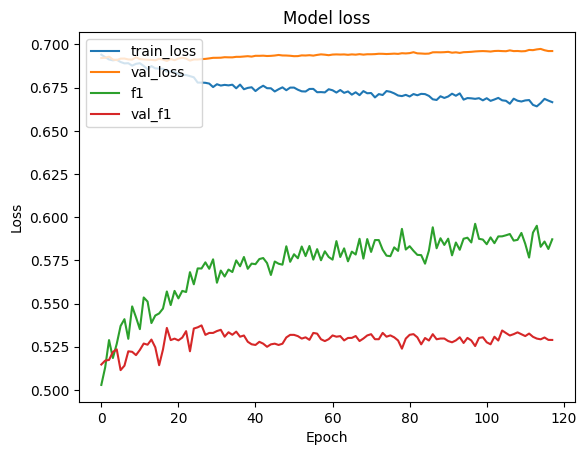

In [22]:
from matplotlib import pyplot as plt
%matplotlib inline
# InteractiveShell.ast_node_interactivity = "last"

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['f1_metric'])
plt.plot(history.history['val_f1_metric'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss', 'f1', 'val_f1'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix, roc_auc_score, cohen_kappa_score
import seaborn as sns

# model = load_model(best_model_path)
test_res = model.evaluate(x_test, y_test, verbose=0)
print("keras evaluate=", test_res)
pred = model.predict(x_test)
pred_classes = np.argmax(pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
check_baseline(pred_classes, y_test_classes)
conf_mat = confusion_matrix(y_test_classes, pred_classes)
print(conf_mat)
labels = [0,1]
# ax = sns.heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
# ax.xaxis.set_ticks_position('top')
f1_weighted = f1_score(y_test_classes, pred_classes, labels=None, 
         average='weighted', sample_weight=None)
print("F1 score (weighted)", f1_weighted)
print("F1 score (macro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='macro', sample_weight=None))
print("F1 score (micro)", f1_score(y_test_classes, pred_classes, labels=None, 
         average='micro', sample_weight=None))  # weighted and micro preferred in case of imbalance
# https://scikit-learn.org/stable/modules/model_evaluation.html#cohen-s-kappa --> supports multiclass; ref: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english
print("cohen's Kappa", cohen_kappa_score(y_test_classes, pred_classes))

prec = []
for i, row in enumerate(conf_mat):
    prec.append(np.round(row[i]/np.sum(row), 2))
    print("precision of class {} = {}".format(i, prec[i]))
print("precision avg", sum(prec)/len(prec))

keras evaluate= [0.6915794014930725, 0.5417212843894958, 0.5420240163803101]
72/72 [==============================] - 0s 918us/step
size of test set 2289
TP class counts (array([0, 1]), array([607, 633]))
True class counts (array([0, 1]), array([1126, 1163]))
Pred class counts (array([0, 1]), array([1137, 1152]))
baseline acc: 0.043687199650502405
[[607 519]
 [530 633]]
F1 score (weighted) 0.5417462941035304
F1 score (macro) 0.5416621411780651
F1 score (micro) 0.5417212756662297
cohen's Kappa 0.08334545404570282
precision of class 0 = 0.54
precision of class 1 = 0.54
precision avg 0.54
